In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

Program: Get those essays, subject the chapters to a tf-idf transformation, make a wordmap of the *Apologie de Raymond Sebond* (Vol. II, Ch.12). 

The essays, in four volumes, are all available in French from gutenberg.org. With Vol.4 not containing original texts by Michel de Montaigne, the bulk of the effort below is dedicated to the first three volumes.  
The text is bilingual, in the historical version and a modern rendering, which need to be separated for analysis purposes. Counterintuitively, the treatment below concerns the modern French version. This is because the 16th century original is chock full of Latin and Greek citations, while the translation presents a homogeneous text.  

In [4]:
path= "C:\\Users\\johag\\Documents\\Transfer Academia\\230319Apologie de Raymond Sebold\\NLP"

In [5]:
os.chdir(path)
os.listdir()

['apologie.png',
 'chapter_keywords_essais.txt',
 'fr_stopwords.txt',
 'LivreI.txt',
 'LivreII.txt',
 'LivreIII.txt',
 'LivreIV.txt',
 'montaigne.ipynb',
 'uk.png']

In [6]:


with open('LivreI.txt', encoding="utf-8") as f:
    i_both = f.readlines()


with open('LivreII.txt', encoding="utf-8") as f:
    ii_both = f.readlines()
    

with open('LivreIII.txt', encoding="utf-8") as f:
    iii_both = f.readlines()
    

with open('LivreIV.txt', encoding="utf-8") as f:
    iv_both = f.readlines()
#i_both = pd.read_csv('LivreI.txt', encoding="utf-8") 


In [7]:
len(i_both)

31585

I want to split the list in two to separate the new part and the old part. The index method (index()) can apparently help

In [7]:
i_old = i_both[:15111]
i_new = i_both[15111:]

In [8]:
i_new

['LIVRE PREMIER\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'CHAPITRE PREMIER.\n',
 '\n',
 '_Divers moyens mènent à même fin._\n',
 '\n',
 '\n',
 "=La soumission vous concilie d'ordinaire ceux que vous avez offensés;\n",
 'parfois une attitude résolue produit le même résultat.=--La façon la\n',
 "plus ordinaire d'attendrir les cœurs de ceux que nous avons offensés,\n",
 "quand, leur vengeance en main, nous sommes à leur merci, c'est de les\n",
 'émouvoir par notre soumission, en leur inspirant commisération et\n',
 'pitié; toutefois la bravoure, la constance et la résolution, qui sont\n',
 'des moyens tout contraires, ont quelquefois produit le même résultat.\n',
 '\n',
 'Edouard, prince de Galles, celui-là même qui, si longtemps, fut régent\n',
 'de notre province de Guyenne, personnage dont les actes et la fortune\n',
 "ont maintes fois témoigné de beaucoup de grandeur d'âme, s'étant emparé\n",
 'de vive force de Limoges, avait ordonné le massacre de ses habitants\n',
 "qui l'avaient gravement 

In [9]:
ii_old = ii_both[177:14191]
ii_new = ii_both[14195:30130]

In [10]:
ii_new


['LIVRE SECOND.\n',
 '(_Suite_).\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'CHAPITRE VII.\n',
 '\n',
 '_Des récompenses honorifiques._\n',
 '\n',
 '\n',
 '=Les distinctions honorifiques sont éminemment propres à récompenser\n',
 "la valeur.=--Les historiens de l'empereur Auguste remarquent que\n",
 "lorsqu'il s'agissait de services militaires, il avait pour règle d'être\n",
 'excessivement prodigue de cadeaux envers ceux qui le méritaient,\n',
 "tandis qu'il était bien autrement parcimonieux de récompenses purement\n",
 'honorifiques; peut-être était-ce parcque son oncle lui avait à\n',
 "lui-même décerné toutes les récompenses militaires avant qu'il eût\n",
 "jamais été à la guerre. C'est une belle invention, qui subsiste dans\n",
 "la plupart des états du monde, que d'avoir créé, pour en honorer et en\n",
 "récompenser la vertu, certaines distinctions s'adressant à la vanité et\n",
 'sans valeur par elles-mêmes, telles que couronnes de laurier, de chêne,\n',
 'de myrte, certains vêtements de 

In [11]:
i_both.index("  donna iusques à certain rocher couppé et precipiteux, où n'en pouuant\n")

14195

In [13]:
ii_new

['LIVRE SECOND.\n',
 '(_Suite_).\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'CHAPITRE VII.\n',
 '\n',
 '_Des récompenses honorifiques._\n',
 '\n',
 '\n',
 '=Les distinctions honorifiques sont éminemment propres à récompenser\n',
 "la valeur.=--Les historiens de l'empereur Auguste remarquent que\n",
 "lorsqu'il s'agissait de services militaires, il avait pour règle d'être\n",
 'excessivement prodigue de cadeaux envers ceux qui le méritaient,\n',
 "tandis qu'il était bien autrement parcimonieux de récompenses purement\n",
 'honorifiques; peut-être était-ce parcque son oncle lui avait à\n',
 "lui-même décerné toutes les récompenses militaires avant qu'il eût\n",
 "jamais été à la guerre. C'est une belle invention, qui subsiste dans\n",
 "la plupart des états du monde, que d'avoir créé, pour en honorer et en\n",
 "récompenser la vertu, certaines distinctions s'adressant à la vanité et\n",
 'sans valeur par elles-mêmes, telles que couronnes de laurier, de chêne,\n',
 'de myrte, certains vêtements de 

In [14]:
iii_old = iii_both[166:13844]
iii_new = iii_both[13848:30267]

In [15]:
iii_new

['LIVRE SECOND. (TRADUCTION)\n',
 '\n',
 '(_Suite._)\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'CHAPITRE XXXVI.\n',
 '\n',
 '_A quels hommes entre tous donner la prééminence._\n',
 '\n',
 '\n',
 'Si on me demandait de choisir entre tous les hommes venus à ma\n',
 "connaissance, je crois possible d'en trouver trois que je placerais\n",
 'au-dessus de tous les autres.\n',
 '\n',
 "=Prééminence d'Homère sur les plus grands génies; estime que l'on en\n",
 "a faite dans tous les temps.=--L'un est Homère, non qu'Aristote ou\n",
 "Varron, par exemple, n'aient pas été aussi savants que lui, ni encore\n",
 'que, dans son art même, Virgile ne puisse lui être comparé, je laisse\n',
 'à juger de ce dernier point à ceux qui les connaissent tous deux; moi,\n',
 "qui n'en connais qu'un, je ne puis que dire, dans la mesure où je suis\n",
 'à même de me prononcer, que je ne crois pas que les Muses elles-mêmes\n',
 'puissent surpasser le poète latin: «_Il chante sur sa lyre savante\n',
 "des vers pareils à ceux 

Now, the different parts of the translated version are combined into a single text.

In [16]:
len(iii_new)

16419

In [17]:
new =i_new.copy()

In [18]:
len(new)

16474

In [19]:
for i in ii_new:
    new.append(i)

In [20]:
for i in iii_new:
    new.append(i)

In [21]:
len(new)

48828

We would like for every chapter to be a different text. In order to achieve that, we have to: 

  *  Merge entire set of strings into a single long string. 
  *  Divide this using the string function .split(). 

In [22]:
mont_new = ''
for i in new:
    mont_new  = mont_new + i

In [23]:
len(mont_new)

3107218

To be able to access individual chapters, these are identified.

In [24]:
chapters = mont_new.split("CHAPITRE")

In [25]:
chapters

['LIVRE PREMIER\n\n\n\n\n',
 " PREMIER.\n\n_Divers moyens mènent à même fin._\n\n\n=La soumission vous concilie d'ordinaire ceux que vous avez offensés;\nparfois une attitude résolue produit le même résultat.=--La façon la\nplus ordinaire d'attendrir les cœurs de ceux que nous avons offensés,\nquand, leur vengeance en main, nous sommes à leur merci, c'est de les\némouvoir par notre soumission, en leur inspirant commisération et\npitié; toutefois la bravoure, la constance et la résolution, qui sont\ndes moyens tout contraires, ont quelquefois produit le même résultat.\n\nEdouard, prince de Galles, celui-là même qui, si longtemps, fut régent\nde notre province de Guyenne, personnage dont les actes et la fortune\nont maintes fois témoigné de beaucoup de grandeur d'âme, s'étant emparé\nde vive force de Limoges, avait ordonné le massacre de ses habitants\nqui l'avaient gravement offensé. Il cheminait à travers la ville, et\nles cris de ceux, hommes, femmes et enfants, ainsi voués à la mort,

In [29]:
len(chapters)

174

In [30]:
(len(chapters))

174

In [31]:
essais = pd.DataFrame({"chapters": chapters})

In [32]:
essais

chapters
0                              LIVRE PREMIER\n\n\n\n\n
1     PREMIER.\n\n_Divers moyens mènent à même fin....
2     II.\n\n_De la tristesse._\n\n\n=La tristesse ...
3     III.\n\n_Nous prolongeons nos affections et n...
4     IV.\n\n_L'âme exerce ses passions sur des obj...
..                                                 ...
169   IX.\n\n_De la vanité._\n\n\n=Montaigne plaisa...
170   X.\n\n_En toutes choses, il faut se modérer e...
171   XI.\n\n_Des boiteux._\n\n\n=Critique du chang...
172   XII.\n\n_De la physionomie._\n\n\n=Presque to...
173   XIII.\n\n_De l'expérience._\n\n\n=L'expérienc...

[174 rows x 1 columns]

In [33]:
essais["word_count"] = essais["chapters"].apply(lambda x: len(x.split()) )

In [34]:
essais

chapters  word_count
0                              LIVRE PREMIER\n\n\n\n\n           2
1     PREMIER.\n\n_Divers moyens mènent à même fin....        1668
2     II.\n\n_De la tristesse._\n\n\n=La tristesse ...        1224
3     III.\n\n_Nous prolongeons nos affections et n...        3106
4     IV.\n\n_L'âme exerce ses passions sur des obj...        1005
..                                                 ...         ...
169   IX.\n\n_De la vanité._\n\n\n=Montaigne plaisa...       28624
170   X.\n\n_En toutes choses, il faut se modérer e...       11047
171   XI.\n\n_Des boiteux._\n\n\n=Critique du chang...        5163
172   XII.\n\n_De la physionomie._\n\n\n=Presque to...       14002
173   XIII.\n\n_De l'expérience._\n\n\n=L'expérienc...       27768

[174 rows x 2 columns]

Some very short passages have ended up included as chapters. These we get rid of. 

In [35]:
short = essais[essais["word_count"] < 100]

In [36]:
essais = essais[essais["word_count"] >  100]

In [37]:
len(essais)

109

<AxesSubplot:>

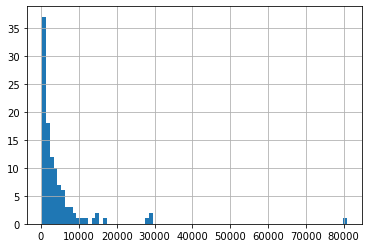

In [38]:
essais['word_count'].hist( bins=80)

In [39]:
essais[essais['word_count'] > 20000]

chapters  word_count
135   XII.\n\n_Apologie de Raimond * Sebond._\n\n\n...       80727
165   V.\n\n_A propos de quelques vers de Virgile._...       28653
169   IX.\n\n_De la vanité._\n\n\n=Montaigne plaisa...       28624
173   XIII.\n\n_De l'expérience._\n\n\n=L'expérienc...       27768

In [40]:
essais[essais['word_count'] < 500]

chapters  word_count
8     VIII.\n\n_De l'oisiveté._\n\n\n=L'esprit est ...         404
21    XXI.\n\n_Ce qui est profit pour l'un est domm...         294
52    LII.\n\n_Parcimonie des anciens._\n\n\n=Exemp...         316
53    LIII.\n\n_A propos d'une phrase de César._\n\...         414
127   VI.--=De l'exercitation.=--De l'exercice.    ...         498
137   XIV.\n\n_Comment notre esprit se crée à lui-m...         401
149   XXVI.\n\n_Du pouce._\n\n\n=Usage, chez certai...         402

Reindexing: we want a new index after dropping over sixty very short "chapters"

In [41]:
len(essais)

109

In [42]:
print(essais['chapters'][21])

 XXI.

_Ce qui est profit pour l'un est dommage pour l'autre._


=Dans toute profession, on ne fait bien ses affaires qu'aux dépens
d'autrui.=--Demades, d'Athènes, prononça une condamnation contre un
homme de cette ville qui faisait commerce des choses nécessaires aux
enterrements, lui reprochant d'en tirer un trop grand profit, qui ne
pouvait se produire sans la mort de beaucoup de gens. Ce jugement ne me
semble pas équitable, parce qu'il n'y a profit pour personne, sans que
ce ne soit aux dépens d'autrui, et qu'à ce compte, tout gain de toute
nature serait condamnable.

Le marchand ne fait bien ses affaires que parce que la jeunesse aime le
plaisir; le laboureur, que lorsque le blé est cher; l'architecte, quand
les maisons tombent en ruine; tout ce qui tient à la magistrature,
vit de nos procès et de nos querelles; les ministres de la religion
eux-mêmes tirent honneur et profit de notre mort et de nos faiblesses
qu'il nous faut racheter; aucun médecin, ainsi que le dit le comique
gre

In [43]:
essais[essais['word_count'] > 10000]

chapters  word_count
25    XXV.\n\n_De l'éducation des enfants._\n\n_A M...       16513
135   XII.\n\n_Apologie de Raimond * Sebond._\n\n\n...       80727
140   XVII.\n\n_De la présomption._\n\n\n=La présom...       15022
160   XXXVII.\n\n_De la ressemblance des enfants av...       14541
165   V.\n\n_A propos de quelques vers de Virgile._...       28653
168   VIII.\n\n_De la conversation._\n\n\n=En punis...       12009
169   IX.\n\n_De la vanité._\n\n\n=Montaigne plaisa...       28624
170   X.\n\n_En toutes choses, il faut se modérer e...       11047
172   XII.\n\n_De la physionomie._\n\n\n=Presque to...       14002
173   XIII.\n\n_De l'expérience._\n\n\n=L'expérienc...       27768

In [44]:
essais = essais.dropna().reset_index(drop=True)

In [45]:
essais

chapters  word_count
0     PREMIER.\n\n_Divers moyens mènent à même fin....        1668
1     II.\n\n_De la tristesse._\n\n\n=La tristesse ...        1224
2     III.\n\n_Nous prolongeons nos affections et n...        3106
3     IV.\n\n_L'âme exerce ses passions sur des obj...        1005
4     V.\n\n_Le commandant d'une place assiégée doi...        1135
..                                                 ...         ...
104   IX.\n\n_De la vanité._\n\n\n=Montaigne plaisa...       28624
105   X.\n\n_En toutes choses, il faut se modérer e...       11047
106   XI.\n\n_Des boiteux._\n\n\n=Critique du chang...        5163
107   XII.\n\n_De la physionomie._\n\n\n=Presque to...       14002
108   XIII.\n\n_De l'expérience._\n\n\n=L'expérienc...       27768

[109 rows x 2 columns]

In [46]:
essay_names = []
for i in range(109):
    essay_names.append(f"ess_{str(i+1)}")

In [47]:
essays = essais["chapters"].to_list()
len(essays)
len(essay_names)

109

In [48]:
for i in range(109):
    print(f"{essay_names[i]} = essays[{i}]\n" )

ess_1 = essays[0]

ess_2 = essays[1]

ess_3 = essays[2]

ess_4 = essays[3]

ess_5 = essays[4]

ess_6 = essays[5]

ess_7 = essays[6]

ess_8 = essays[7]

ess_9 = essays[8]

ess_10 = essays[9]

ess_11 = essays[10]

ess_12 = essays[11]

ess_13 = essays[12]

ess_14 = essays[13]

ess_15 = essays[14]

ess_16 = essays[15]

ess_17 = essays[16]

ess_18 = essays[17]

ess_19 = essays[18]

ess_20 = essays[19]

ess_21 = essays[20]

ess_22 = essays[21]

ess_23 = essays[22]

ess_24 = essays[23]

ess_25 = essays[24]

ess_26 = essays[25]

ess_27 = essays[26]

ess_28 = essays[27]

ess_29 = essays[28]

ess_30 = essays[29]

ess_31 = essays[30]

ess_32 = essays[31]

ess_33 = essays[32]

ess_34 = essays[33]

ess_35 = essays[34]

ess_36 = essays[35]

ess_37 = essays[36]

ess_38 = essays[37]

ess_39 = essays[38]

ess_40 = essays[39]

ess_41 = essays[40]

ess_42 = essays[41]

ess_43 = essays[42]

ess_44 = essays[43]

ess_45 = essays[44]

ess_46 = essays[45]

ess_47 = essays[46]

ess_48 = essays[47]

ess_49 = es

# 2. Exploring wordmaps for the Apology 

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

Making a corpus:

In [88]:
essays = essais["chapters"].to_list()

In [89]:
ess_1 = essays[0]

ess_2 = essays[1]

ess_3 = essays[2]

ess_4 = essays[3]

ess_5 = essays[4]

ess_6 = essays[5]

ess_7 = essays[6]

ess_8 = essays[7]

ess_9 = essays[8]

ess_10 = essays[9]

ess_11 = essays[10]

ess_12 = essays[11]

ess_13 = essays[12]

ess_14 = essays[13]

ess_15 = essays[14]

ess_16 = essays[15]

ess_17 = essays[16]

ess_18 = essays[17]

ess_19 = essays[18]

ess_20 = essays[19]

ess_21 = essays[20]

ess_22 = essays[21]

ess_23 = essays[22]

ess_24 = essays[23]

ess_25 = essays[24]

ess_26 = essays[25]

ess_27 = essays[26]

ess_28 = essays[27]

ess_29 = essays[28]

ess_30 = essays[29]

ess_31 = essays[30]

ess_32 = essays[31]

ess_33 = essays[32]

ess_34 = essays[33]

ess_35 = essays[34]

ess_36 = essays[35]

ess_37 = essays[36]

ess_38 = essays[37]

ess_39 = essays[38]

ess_40 = essays[39]

ess_41 = essays[40]

ess_42 = essays[41]

ess_43 = essays[42]

ess_44 = essays[43]

ess_45 = essays[44]

ess_46 = essays[45]

ess_47 = essays[46]

ess_48 = essays[47]

ess_49 = essays[48]

ess_50 = essays[49]

ess_51 = essays[50]

ess_52 = essays[51]

ess_53 = essays[52]

ess_54 = essays[53]

ess_55 = essays[54]

ess_56 = essays[55]

ess_57 = essays[56]

ess_58 = essays[57]

ess_59 = essays[58]

ess_60 = essays[59]

ess_61 = essays[60]

ess_62 = essays[61]

ess_63 = essays[62]

ess_64 = essays[63]

ess_65 = essays[64]

ess_66 = essays[65]

ess_67 = essays[66]

ess_68 = essays[67]

ess_69 = essays[68]

ess_70 = essays[69]

ess_71 = essays[70]

ess_72 = essays[71]

ess_73 = essays[72]

ess_74 = essays[73]

ess_75 = essays[74]

ess_76 = essays[75]

ess_77 = essays[76]

ess_78 = essays[77]

ess_79 = essays[78]

ess_80 = essays[79]

ess_81 = essays[80]

ess_82 = essays[81]

ess_83 = essays[82]

ess_84 = essays[83]

ess_85 = essays[84]

ess_86 = essays[85]

ess_87 = essays[86]

ess_88 = essays[87]

ess_89 = essays[88]

ess_90 = essays[89]

ess_91 = essays[90]

ess_92 = essays[91]

ess_93 = essays[92]

ess_94 = essays[93]

ess_95 = essays[94]

ess_96 = essays[95]

ess_97 = essays[96]

ess_98 = essays[97]

ess_99 = essays[98]

ess_100 = essays[99]

ess_101 = essays[100]

ess_102 = essays[101]

ess_103 = essays[102]

ess_104 = essays[103]

ess_105 = essays[104]

ess_106 = essays[105]

ess_107 = essays[106]

ess_108 = essays[107]

ess_109 = essays[108]

These terms now serve as keys for accessing the texts:  

In [91]:
corpus = [ ess_1, ess_2, ess_3, ess_4, ess_5, ess_6, ess_7, ess_8, ess_9, ess_10, ess_11, ess_12, ess_13, ess_14, ess_15, ess_16, ess_17, ess_18, ess_19, ess_20, ess_21, ess_22, ess_23, ess_24, ess_25, ess_26, ess_27, ess_28, ess_29, ess_30, ess_31, ess_32, ess_33, ess_34, ess_35, ess_36, ess_37, ess_38, ess_39, ess_40, ess_41, ess_42, ess_43, ess_44, ess_45, ess_46, ess_47, ess_48, ess_49, ess_50, ess_51, ess_52, ess_53, ess_54, ess_55, ess_56, ess_57, ess_58, ess_59, ess_60, ess_61, ess_62, ess_63, ess_64, ess_65, ess_66, ess_67, ess_68, ess_69, ess_70, ess_71, ess_72, ess_73, ess_74, ess_75, ess_76, ess_77, ess_78, ess_79, ess_80, ess_81, ess_82, ess_83, ess_84, ess_85, ess_86, ess_87, ess_88, ess_89, ess_90, ess_91, ess_92, ess_93, ess_94, ess_95, ess_96, ess_97, ess_98, ess_99, ess_100, ess_101, ess_102, ess_103, ess_104, ess_105, ess_106, ess_107, ess_108, ess_109]

A naive wordmap of the Apology would just take these texts and map them. This is, however, not expedient, as it would just leave us looking at a screen full of very frequent terms, so-called stopwords.

In [92]:
len(corpus)

109

In [93]:
text = essais["chapters"][70]

Now, we can define the tf-idf model that will yield the words to be plotted in the model. Scikit Learn, better known for machine learning applications,  has this function, and it saves us the trouble of dealing with frequencies. 

Tf-idf offers information related to which words frequent in a given text compared to their overall frequency in the corpus.
For further information on this measure, see, for example: 
https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [109]:
vectorizer = TfidfVectorizer(stop_words= None, ngram_range = (1,1), max_df = .8, min_df = .01)

In [110]:
X = vectorizer.fit_transform(corpus)

In [111]:
X

<109x14100 sparse matrix of type '<class 'numpy.float64'>'
	with 115003 stored elements in Compressed Sparse Row format>

In [112]:
feature_names = vectorizer.get_feature_names_out()

In [113]:
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

000   30   _a  _ah    _ainsi  _alors  _après  _arioste_  _attius_  _au  \
0  0.0  0.0  0.0  0.0  0.000000     0.0     0.0        0.0       0.0  0.0   
1  0.0  0.0  0.0  0.0  0.000000     0.0     0.0        0.0       0.0  0.0   
2  0.0  0.0  0.0  0.0  0.000000     0.0     0.0        0.0       0.0  0.0   
3  0.0  0.0  0.0  0.0  0.049317     0.0     0.0        0.0       0.0  0.0   
4  0.0  0.0  0.0  0.0  0.000000     0.0     0.0        0.0       0.0  0.0   

   ...  ôte  ôtent      ôter  ôté  œdipe       œil  œuf  œufs     œuvre  \
0  ...  0.0    0.0  0.000000  0.0    0.0  0.000000  0.0   0.0  0.000000   
1  ...  0.0    0.0  0.000000  0.0    0.0  0.000000  0.0   0.0  0.000000   
2  ...  0.0    0.0  0.000000  0.0    0.0  0.000000  0.0   0.0  0.015697   
3  ...  0.0    0.0  0.046822  0.0    0.0  0.000000  0.0   0.0  0.000000   
4  ...  0.0    0.0  0.000000  0.0    0.0  0.035205  0.0   0.0  0.000000   

   œuvres  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 14100 columns]

In [114]:
data = df.transpose()

In [115]:
data

0    1         2         3         4    5    6         7    8    9    \
000     0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
30      0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
_a      0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
_ah     0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
_ainsi  0.0  0.0  0.000000  0.049317  0.000000  0.0  0.0  0.081422  0.0  0.0   
...     ...  ...       ...       ...       ...  ...  ...       ...  ...  ...   
œil     0.0  0.0  0.000000  0.000000  0.035205  0.0  0.0  0.000000  0.0  0.0   
œuf     0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
œufs    0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
œuvre   0.0  0.0  0.015697  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
œuvres  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   

        ...       99        100       101  102       103       104       105  \
000     ...  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
30      ...  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
_a      ...  0.000000  0.011030  0.009632  0.0  0.007706  0.000000  0.008247   
_ah     ...  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
_ainsi  ...  0.000000  0.004893  0.000000  0.0  0.000000  0.000000  0.010976   
...     ...       ...       ...       ...  ...       ...       ...       ...   
œil     ...  0.000000  0.000000  0.010907  0.0  0.000000  0.003967  0.000000   
œuf     ...  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
œufs    ...  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
œuvre   ...  0.022297  0.002908  0.015237  0.0  0.030476  0.002771  0.006523   
œuvres  ...  0.000000  0.003677  0.000000  0.0  0.007706  0.000000  0.000000   

             106       107       108  
000     0.000000  0.000000  0.000000  
30      0.000000  0.000000  0.000000  
_a      0.000000  0.006597  0.003685  
_ah     0.000000  0.000000  0.000000  
_ainsi  0.000000  0.008780  0.009809  
...          ...       ...       ...  
œil     0.016379  0.007471  0.008346  
œuf     0.000000  0.011469  0.006407  
œufs    0.000000  0.000000  0.006407  
œuvre   0.011440  0.020872  0.008745  
œuvres  0.000000  0.006597  0.003685  

[14100 rows x 109 columns]

In [116]:
top = data.iloc[:,70].sort_values(ascending=False).head(30)

In [117]:
top

dieu           0.155254
animaux        0.139937
choses         0.125739
sens           0.124278
âme            0.120469
corps          0.118492
science        0.117229
ni             0.116195
raison         0.112494
rien           0.110409
toutes         0.106777
nature         0.103536
_lucrèce_      0.097698
sommes         0.095317
monde          0.093514
bêtes          0.093178
vous           0.092191
mêmes          0.090674
esprit         0.086315
dieux          0.083610
là             0.078452
vérité         0.076479
cet            0.075576
chose          0.073707
philosophes    0.073504
platon         0.072858
vie            0.071853
opinions       0.071034
dire           0.070604
terre          0.069582
Name: 70, dtype: float64

In [118]:
data.columns = ['ess_0', 'ess_1', 'ess_2', 'ess_3', 'ess_4', 'ess_5', 'ess_6', 'ess_7', 'ess_8', 'ess_9', 'ess_10', 'ess_11', 'ess_12', 'ess_13', 'ess_14', 'ess_15', 'ess_16', 'ess_17', 'ess_18', 'ess_19', 'ess_20', 'ess_21', 'ess_22', 'ess_23', 'ess_24', 'ess_25', 'ess_26', 'ess_27', 'ess_28', 'ess_29', 'ess_30', 'ess_31', 'ess_32', 'ess_33', 'ess_34', 'ess_35', 'ess_36', 'ess_37', 'ess_38', 'ess_39', 'ess_40', 'ess_41', 'ess_42', 'ess_43', 'ess_44', 'ess_45', 'ess_46', 'ess_47', 'ess_48','ess_49', 'ess_50', 'ess_51', 'ess_52', 'ess_53', 'ess_54', 'ess_55',  'ess_56', 'ess_57', 'ess_58', 'ess_59', 'ess_60', 'ess_61', 'ess_62', 'ess_63', 'ess_64', 'ess_65', 'ess_66', 'ess_67', 'ess_68', 'ess_69', 'ess_70', 'ess_71', 'ess_72', 'ess_73', 'ess_74', 'ess_75', 'ess_76', 'ess_77', 'ess_78', 'ess_79', 'ess_80', 'ess_81', 'ess_82', 'ess_83', 'ess_84', 'ess_85', 'ess_86', 'ess_87', 'ess_88', 'ess_89', 'ess_90', 'ess_91', 'ess_92', 'ess_93', 'ess_94', 'ess_95', 'ess_96', 'ess_97', 'ess_98', 'ess_99', 'ess_100', 'ess_101', 'ess_102', 'ess_103', 'ess_104', 'ess_105', 'ess_106', 'ess_107', 'ess_108']


In [119]:
data

ess_0  ess_1     ess_2     ess_3     ess_4  ess_5  ess_6     ess_7  \
000       0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   
30        0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   
_a        0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   
_ah       0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   
_ainsi    0.0    0.0  0.000000  0.049317  0.000000    0.0    0.0  0.081422   
...       ...    ...       ...       ...       ...    ...    ...       ...   
œil       0.0    0.0  0.000000  0.000000  0.035205    0.0    0.0  0.000000   
œuf       0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   
œufs      0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   
œuvre     0.0    0.0  0.015697  0.000000  0.000000    0.0    0.0  0.000000   
œuvres    0.0    0.0  0.000000  0.000000  0.000000    0.0    0.0  0.000000   

        ess_8  ess_9  ...    ess_99   ess_100   ess_101  ess_102   ess_103  \
000       0.0    0.0  ...  0.000000  0.000000  0.000000      0.0  0.000000   
30        0.0    0.0  ...  0.000000  0.000000  0.000000      0.0  0.000000   
_a        0.0    0.0  ...  0.000000  0.011030  0.009632      0.0  0.007706   
_ah       0.0    0.0  ...  0.000000  0.000000  0.000000      0.0  0.000000   
_ainsi    0.0    0.0  ...  0.000000  0.004893  0.000000      0.0  0.000000   
...       ...    ...  ...       ...       ...       ...      ...       ...   
œil       0.0    0.0  ...  0.000000  0.000000  0.010907      0.0  0.000000   
œuf       0.0    0.0  ...  0.000000  0.000000  0.000000      0.0  0.000000   
œufs      0.0    0.0  ...  0.000000  0.000000  0.000000      0.0  0.000000   
œuvre     0.0    0.0  ...  0.022297  0.002908  0.015237      0.0  0.030476   
œuvres    0.0    0.0  ...  0.000000  0.003677  0.000000      0.0  0.007706   

         ess_104   ess_105   ess_106   ess_107   ess_108  
000     0.000000  0.000000  0.000000  0.000000  0.000000  
30      0.000000  0.000000  0.000000  0.000000  0.000000  
_a      0.000000  0.008247  0.000000  0.006597  0.003685  
_ah     0.000000  0.000000  0.000000  0.000000  0.000000  
_ainsi  0.000000  0.010976  0.000000  0.008780  0.009809  
...          ...       ...       ...       ...       ...  
œil     0.003967  0.000000  0.016379  0.007471  0.008346  
œuf     0.000000  0.000000  0.000000  0.011469  0.006407  
œufs    0.000000  0.000000  0.000000  0.000000  0.006407  
œuvre   0.002771  0.006523  0.011440  0.020872  0.008745  
œuvres  0.000000  0.000000  0.000000  0.006597  0.003685  

[14100 rows x 109 columns]

In [120]:
data = df.transpose()
data.columns = ['ess_0', 'ess_1', 'ess_2', 'ess_3', 'ess_4', 'ess_5', 'ess_6', 'ess_7', 'ess_8', 'ess_9', 'ess_10', 'ess_11', 'ess_12', 'ess_13', 'ess_14', 'ess_15', 'ess_16', 'ess_17', 'ess_18', 'ess_19', 'ess_20', 'ess_21', 'ess_22', 'ess_23', 'ess_24', 'ess_25', 'ess_26', 'ess_27', 'ess_28', 'ess_29', 'ess_30', 'ess_31', 'ess_32', 'ess_33', 'ess_34', 'ess_35', 'ess_36', 'ess_37', 'ess_38', 'ess_39', 'ess_40', 'ess_41', 'ess_42', 'ess_43', 'ess_44', 'ess_45', 'ess_46', 'ess_47', 'ess_48','ess_49', 'ess_50', 'ess_51', 'ess_52', 'ess_53', 'ess_54', 'ess_55',  'ess_56', 'ess_57', 'ess_58', 'ess_59', 'ess_60', 'ess_61', 'ess_62', 'ess_63', 'ess_64', 'ess_65', 'ess_66', 'ess_67', 'ess_68', 'ess_69', 'ess_70', 'ess_71', 'ess_72', 'ess_73', 'ess_74', 'ess_75', 'ess_76', 'ess_77', 'ess_78', 'ess_79', 'ess_80', 'ess_81', 'ess_82', 'ess_83', 'ess_84', 'ess_85', 'ess_86', 'ess_87', 'ess_88', 'ess_89', 'ess_90', 'ess_91', 'ess_92', 'ess_93', 'ess_94', 'ess_95', 'ess_96', 'ess_97', 'ess_98', 'ess_99', 'ess_100', 'ess_101', 'ess_102', 'ess_103', 'ess_104', 'ess_105', 'ess_106', 'ess_107', 'ess_108']

# Find the top 30 words said by each President
top_dict = {}
for c in range(109):
    top = data.iloc[:,c].sort_values(ascending=False).head(30)
    top_dict[data.columns[c]]= tuple(zip(top.index, top.values))
# Print the top 15 words said by each President
contents = ""
for president, top_words in top_dict.items():
    contents = contents + president + '\n' + ', '.join([word for word, count in top_words[0:14]]) + '\n' + '---' + '\n'
    print(president)
    print(', '.join([word for word, count in top_words[0:20]]))
    print('---')




ess_0
ville, attendrir, courage, admiration, alexandre, pitié, denys, femmes, arracher, ondoyant, massacre, noyer, vengeance, énergiques, supplications, duc, cruauté, contraires, grâce, merci
---
ess_1
tristesse, mourut, exprimer, fils, cambyse, douleur, chagrin, douleur_, raisonne, joie, larmes, mes, peu, brûle, mort, nouvelle, fille, hors, disposition, malheurs
---
ess_2
mort, corps, tombeau, sépulture, maximilien, avenir, ni, tu, contre, funérailles, heureux, jamais, victoire, pourquoi, solon, vivant, expirer, bayard, vie, honneurs
---
ess_3
varus, objets, venger, contre, douleur, dieu, neptune, transports, prenons, frapper, cause, armée, âme, éprouvé, faut, auguste, donc, mit, ressortir, _lucain_
---
ess_4
parlementer, ennemi, assiégée, guerre, château, comte, adversaire, ruse, gouverneur, place, antigone, guy, vaux, henry, déclaration, surprises, hostilités, sénateurs, contre, non
---
ess_5
ville, pourparlers, ennemi, commandait, vaincre, parlementer, assiégeait, conclu, emportée,

In [121]:
#This I have saved to a .txt file: 
with open('chapter_keywords_essais.txt', 'w') as f:
    f.write(contents)

The with statement assures that ressources are closed right after access, so there is no need to close the resource separately.

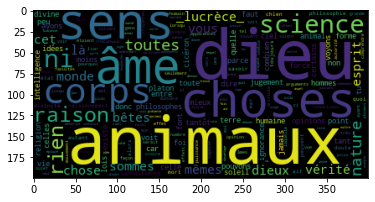

In [124]:
wordcloud = WordCloud().generate_from_frequencies(data['ess_70'])
plt.imshow(wordcloud)

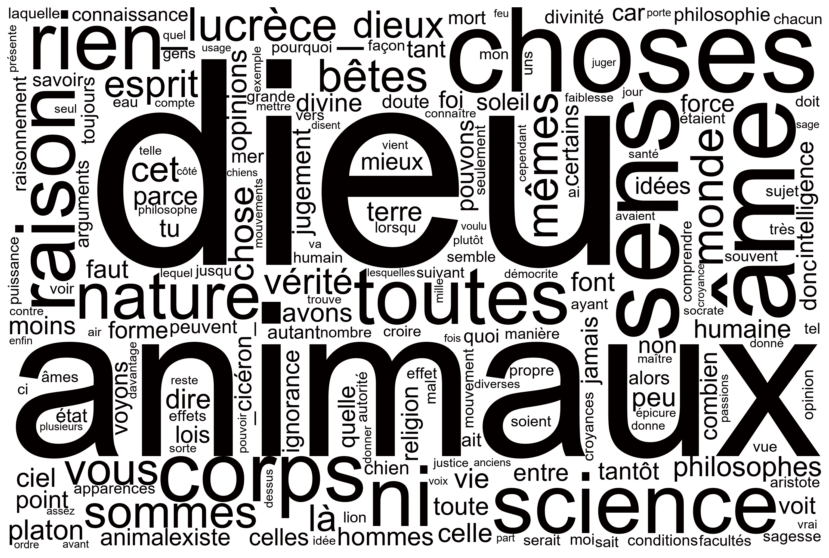

In [136]:
#The article provides this beautification function for wordclouds
# change the value to black
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = 'C:\\Windows\\Fonts\\Arial.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(top)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('apologie.png')